In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!unzip -uq "/content/drive/My Drive/g_drive.zip" -d "/content/drive/My Drive/nn_images"

In [0]:
batch_size = 256

IMG_HEIGHT = 350
IMG_WIDTH = 250

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [5]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/drive/My Drive/nn_images/train_set',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 4960 images belonging to 5 classes.


In [6]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='/content/drive/My Drive/nn_images/test_set',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 1350 images belonging to 5 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
plotImages(sample_training_images[:5])

In [7]:
base_model = keras.applications.xception.Xception(weights='imagenet',include_top=False)

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
avg=keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(5, activation='softmax')(avg)
model = keras.Model(inputs=base_model.input,outputs=output)

In [0]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [0]:
checkpoint= tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/My Drive/models/{epoch:02d}-{val_accuracy:.2f}.h5',
monitor='val_accuracy',
verbose=1, save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 min_delta=0, patience=10, verbose=1,
                                                 mode='auto',restore_best_weights=True)



In [0]:
for layer in base_model.layers:
    layer.trainable=False

In [0]:
optimizer = keras.optimizers.SGD(lr=0.2,momentum=0.9,decay=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [0]:
history_base_model = model.fit(
    train_data_gen,
    epochs=10,
    
    steps_per_epoch=20,
    validation_data=val_data_gen,
  validation_steps=3,callbacks = [checkpoint,early_stopping] )

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.8988 - accuracy: 0.4504  
Epoch 00001: val_accuracy improved from -inf to 0.57682, saving model to /content/drive/My Drive/models/01-0.58.h5
20/20 [==============================] - 1918s 96s/step - loss: 1.8988 - accuracy: 0.4504 - val_loss: 1.3567 - val_accuracy: 0.5768
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.8160 - accuracy: 0.7175  
Epoch 00002: val_accuracy improved from 0.57682 to 0.73196, saving model to /content/drive/My Drive/models/02-0.73.h5
20/20 [==============================] - 1840s 92s/step - loss: 0.8160 - accuracy: 0.7175 - val_loss: 0.6960 - val_accuracy: 0.7320
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.7935  
Epoch 00003: val_accuracy improved from 0.73196 to 0.78255, saving model to /content/drive/My Drive/models/03-0.78.h5
20/20 [==============================] - 1908s 95s/step - loss: 0.5625 - accuracy: 0.7935 - val_l

In [0]:
keras.models.save_model(model, '/content/drive/My Drive/models/final.h5')

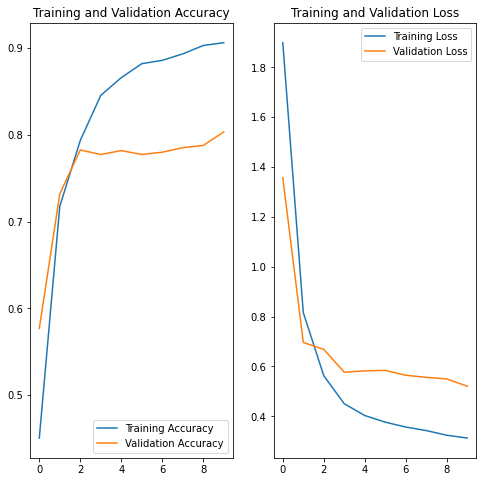

In [0]:
acc = history_base_model.history['accuracy']
val_acc = history_base_model.history['val_accuracy']

loss=history_base_model.history['loss']
val_loss=history_base_model.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
new_model = keras.models.load_model('/content/drive/My Drive/models/final.h5')

In [0]:
for layer in base_model.layers:
    layer.trainable=True

In [11]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001)
new_model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = new_model.fit(
    train_data_gen,
    epochs=10,
    steps_per_epoch=20,
    validation_data=val_data_gen, validation_steps=3,
    callbacks=[checkpoint,early_stopping])

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.3014 - accuracy: 0.9143  
Epoch 00001: val_accuracy improved from -inf to 0.79297, saving model to /content/drive/My Drive/models/01-0.79.h5
20/20 [==============================] - 1978s 99s/step - loss: 0.3014 - accuracy: 0.9143 - val_loss: 0.5428 - val_accuracy: 0.7930
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.3044 - accuracy: 0.9153  
Epoch 00002: val_accuracy did not improve from 0.79297
20/20 [==============================] - 1906s 95s/step - loss: 0.3044 - accuracy: 0.9153 - val_loss: 0.5719 - val_accuracy: 0.7921
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.9131  
Epoch 00003: val_accuracy did not improve from 0.79297
20/20 [==============================] - 1958s 98s/step - loss: 0.3038 - accuracy: 0.9131 - val_loss: 0.5466 - val_accuracy: 0.7904
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.3000 - accuracy: 0.91

In [0]:
keras.models.save_model(new_model, '/content/drive/My Drive/models/final_v2.h5')

In [0]:
new_model_2 = keras.models.load_model('/content/drive/My Drive/models/final_v2.h5')

In [0]:
history_base_model = model.fit(
    train_data_gen,
    epochs=10,
    
    steps_per_epoch=20,
    validation_data=val_data_gen,
  validation_steps=3,callbacks = [checkpoint,early_stopping] )

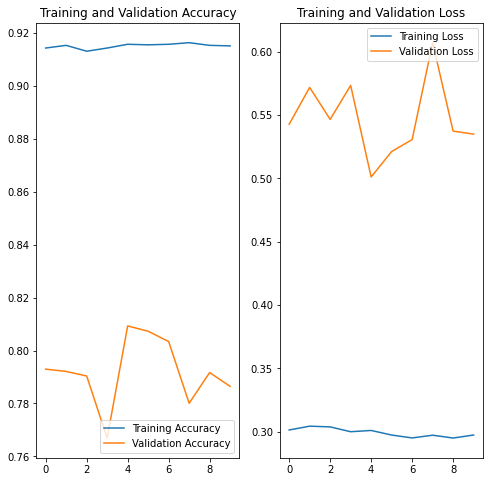

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss =history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()